<a href="https://colab.research.google.com/github/dim447/project_01/blob/master/FitoFarm01_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Задачи исследования**

### Загружаем данные и объединяем три датасета - ОЗОН позволяется выгружать данные за 3 месяца.



*1. Осмотр данных*
- посмотрим начало и конец датасета
- сделаем предварительные выводы
- поищем аномалии



*2. Обработка данных*
- найти и обработать пропуски
- заменить некорректные типы данных
- удалить дубликаты
- подсчитать и добавить цену квадратного метра
- добавить месяц - вместо даты название месяца
- посмотреть разную статистику, связь товара и склада отгрузки,региона доставки


*3. Ответы на вопросы*
- Какой самый популярный чай? Укажите наиболее важные характеристики
и постройте графики?
- Какую сумму приносит каждая позиция?
- Какие регионы больше всего покупают, какие склады использовать?
- Как загружены склады отгрузки?
- Проверим куда больше отправляют товар по каждой позиции!



*4. Результаты исследования*
- Общие выводы
- Рекомендации


*Описание данных:*

*   'Дата отгрузки' - Дата отгрузки товара
*   'Месяц отгрузки' - Месяц выделяем из даты
*   'Наименование товара' - Наименование товара
*   'Итоговая стоимость товара' - Сумма продажи товара
*   'Количество' - Количество отгруженного товара
*   'Кластер отгрузки' - Логистика ОЗОН
*   'Кластер доставки' - Логистика ОЗОН
*   'Склад отгрузки' - Склад отгрузки ОЗОН
*   'Регион доставки' - Регион доставки товара
*   'Город доставки' - Город доставки товара (не всегда указан)


### Загружаем данные и объединяем три датасета

In [1]:
import pandas as pd
from datetime import datetime

df01 = pd.read_csv('/content/orders01_03.csv', sep=';')
df02 = pd.read_csv('/content/orders04_06.csv', sep=';')
df03 = pd.read_csv('/content/orders07_08.csv', sep=';')
df = pd.concat([df01, df02, df03])
df.shape


(2606, 32)

In [30]:
df.head(5)

,Дата отгрузки,Месяц отгрузки,Наименование товара,Итоговая стоимость товара,Количество,Кластер отгрузки,Кластер доставки,Склад отгрузки,Регион доставки,Город доставки
0,2023-04-01 02:00:00,April,Чай травяной Друг Вашего сна ф/п 1.5г №20 / 20...,157.0,1,Юг,Вологда,АДЫГЕЙСК_РФЦ,Вологодская Область,Вологда
1,2023-04-01 01:00:00,April,"Чай липы цветки 50г/ травяной сбор ""Целебная П...",318.0,1,Санкт-Петербург и СЗО,Санкт-Петербург Север,СПБ_БУГРЫ_РФЦ,Санкт-Петербург,Санкт-Петербург
2,2023-04-01 02:00:00,April,Чай травяной Друг Вашего сна ф/п 1.5г №20 / 20...,157.0,1,Юг,Вологда,АДЫГЕЙСК_РФЦ,Вологодская Область,Вологда
3,2023-04-01 01:30:00,April,"Чай мяты перечной листья 50г/ травяной сбор ""Ц...",260.0,1,Урал,Сургут,ЕКАТЕРИНБУРГ_РФЦ_НОВЫЙ,Ханты-Мансийский Автономный округ - Югра,Нягань
4,2023-04-06 01:00:00,April,Чай травяной Друг Вашего желудка ф/п 1.5г №20 ...,157.0,1,Санкт-Петербург и СЗО,Санкт-Петербург Север,СПБ_БУГРЫ_РФЦ,Санкт-Петербург,Санкт-Петербург


In [31]:
df.tail(5)

,Дата отгрузки,Месяц отгрузки,Наименование товара,Итоговая стоимость товара,Количество,Кластер отгрузки,Кластер доставки,Склад отгрузки,Регион доставки,Город доставки
683,2023-07-03 01:00:00,July,Чай травяной Друг Вашего иммунитета ф/п 1.5г №...,173.0,1,Санкт-Петербург и СЗО,Санкт-Петербург Юг,СПБ_БУГРЫ_РФЦ,Санкт-Петербург,Санкт-Петербург
684,2023-07-02 15:00:00,July,Чай травяной Друг Вашей поджелудочной железы ф...,154.0,1,Урал,Пермь,ЕКАТЕРИНБУРГ_РФЦ_НОВЫЙ,Пермский Край,NaN
685,2023-07-06 13:30:00,July,Чай травяной Друг Вашей печени ф/п 1.5г №20 /2...,179.0,1,Санкт-Петербург и СЗО,Петрозаводск,СПБ_БУГРЫ_РФЦ,Республика Карелия,NaN
686,2023-07-05 00:00:00,July,Чай травяной Друг Вашего желудка ф/п 1.5г №20 ...,170.0,1,Юг,Краснодар,НОВОРОССИЙСК_МРФЦ,Краснодарский Край,NaN
687,2023-07-02 01:00:00,July,Чай травяной Друг Вашей печени ф/п 1.5г №20 /2...,179.0,1,Санкт-Петербург и СЗО,Ленинградская область Юг,САНКТ-ПЕТЕРБУРГ_РФЦ,Ленинградская Область,Тосно


In [58]:
df.columns

Index(['Дата отгрузки', 'Месяц отгрузки', 'Наименование товара',
       'Итоговая стоимость товара', 'Количество', 'Кластер отгрузки',
       'Кластер доставки', 'Склад отгрузки', 'Регион доставки',
       'Город доставки'],
      dtype='object')

### Убираем ненужные колонки и выбираем случайные 5 записей

In [45]:
df = df.drop(['Номер заказа', 'Номер отправления', 'Принят в обработку',
       'Статус', 'Дата доставки', 'Сумма отправления',
       'Код валюты отправления','OZON id', 'Артикул','Связанные отправления', 'Выкуп товара',
       'Цена товара до скидок', 'Скидка %', 'Скидка руб', 'Акции',
       'Объемный вес товаров, кг','Способ доставки', 'Сегмент клиента', 'Юридическое лицо',
       'Способ оплаты', 'Штрихкод ювелирного изделия','Код валюты товара','Стоимость доставки'], axis=1)
df.sample(5)

,Дата отгрузки,Месяц отгрузки,Наименование товара,Итоговая стоимость товара,Количество,Кластер отгрузки,Кластер доставки,Склад отгрузки,Регион доставки,Город доставки
343,2023-08-06 09:00:00,August,"Экстракт трав в капсулах ""Друг вашей поджелудо...",855.0,1,Москва и МО,Ростов,ЖУКОВСКИЙ_РФЦ,Ростовская Область,Новочеркасск
220,2023-05-28 22:00:00,May,Чай травяной Друг Вашей поджелудочной железы ф...,159.0,1,Центр и дальние регионы,Москва ЮЗАО (Недействительный),ПУШКИНО_1_РФЦ,Москва,Москва
938,2023-01-19 23:00:00,January,Чай травяной Друг Вашего давления ф/п 1.5г №20...,148.0,1,Санкт-Петербург и СЗО,Вологда,СПБ_БУГРЫ_РФЦ,Вологодская Область,Вологда
344,2023-08-07 01:00:00,August,Чай травяной Друг Вашего желудка ф/п 1.5г №20 ...,164.0,1,Санкт-Петербург и СЗО,Ленинградская область Север,СПБ_БУГРЫ_РФЦ,Ленинградская Область,Мурино
105,2023-08-25 22:00:00,August,Чай травяной Домбайский вальс Облепиха ф/п 1.5...,155.0,1,Юг,Воронеж,АДЫГЕЙСК_РФЦ,Воронежская Область,Воронеж


### Посчитаем статистику того, что можно считать: Стоимость и количество

In [4]:
df.describe()

,Итоговая стоимость товара,Количество
count,2606.000000,2606.000000
mean,202.860246,1.008442
std,131.283956,0.120483
min,108.000000,1.000000
25%,153.000000,1.000000
50%,163.000000,1.000000
75%,179.557500,1.000000
max,950.000000,5.000000


### Выведем общую сумму продаж

In [5]:

df['Итоговая стоимость товара'].sum()

528653.8

### Дубликаты есть, потому названия товара повторяются

In [33]:
df.duplicated().sum()

420

### Ищем нулевые ячейки, нас интересует месяц отгрузки и дата отгрузки

In [34]:
df.isnull().sum().sort_values()

Наименование товара            0
Итоговая стоимость товара      0
Количество                     0
Кластер доставки               0
Склад отгрузки                 0
Кластер отгрузки               6
Дата отгрузки                 13
Месяц отгрузки                13
Регион доставки               14
Город доставки               354
dtype: int64

В основном это последние продажи - сентябрь, заменим нулевые значения на сентябрь.
Регион и город доставки, Кластер отгрузки могут быть не указаны

In [39]:
df['Месяц отгрузки'] = df['Месяц отгрузки']. fillna ('September')
df['Дата отгрузки'] = df['Дата отгрузки']. fillna ('2023-09-01 01:00:00')
df.isnull().sum().sort_values()

Дата отгрузки                  0
Месяц отгрузки                 0
Наименование товара            0
Итоговая стоимость товара      0
Количество                     0
Кластер доставки               0
Склад отгрузки                 0
Кластер отгрузки               6
Регион доставки               14
Город доставки               354
dtype: int64

Склад отгрузки нет нулевых значений, посмотрим уникальные названия

In [6]:
df['Склад отгрузки'].unique()

array(['АДЫГЕЙСК_РФЦ', 'СПБ_БУГРЫ_РФЦ', 'ЕКАТЕРИНБУРГ_РФЦ_НОВЫЙ',
       'ПУШКИНО_2_РФЦ', 'САМАРА_РФЦ', 'ПУШКИНО_1_РФЦ', 'ВОРОНЕЖ_МРФЦ',
       'НИЖНИЙ_НОВГОРОД_РФЦ', 'КАЗАНЬ_РФЦ_НОВЫЙ', 'РОСТОВ-НА-ДОНУ_РФЦ',
       'НОВОСИБИРСК_РФЦ_НОВЫЙ', 'FRESH_MAX_РСТ_ШОЛОХОВО',
       'САНКТ-ПЕТЕРБУРГ_РФЦ', 'КАЛИНИНГРАД_МРФЦ', 'НОВОРОССИЙСК_МРФЦ',
       'FRESH_MAX_РСТ_ЗАПАДНЫЙ', 'КРАСНОЯРСК_МРФЦ', 'ХОРУГВИНО_РФЦ',
       'FRESH_MAX_КДР_ПОНОМАРЕНКО', 'ТВЕРЬ_РФЦ', 'FRESH_MAX_ВЛГ_ЗЕМЛЯЧКИ',
       'ЖУКОВСКИЙ_РФЦ', 'FRESH_MAX_КДР_МЕДИА_ПЛАЗА', 'СПБ_ШУШАРЫ_РФЦ'],
      dtype=object)

Посмотрим откуда больше всего отгружается товар и отсортируем его по убыванию

In [7]:
sklad_otgruzki = df.groupby('Склад отгрузки')['Количество'].count()
sklad_otgruzki.sort_values(ascending=False)

Склад отгрузки
ПУШКИНО_1_РФЦ                534
САМАРА_РФЦ                   349
СПБ_БУГРЫ_РФЦ                310
ПУШКИНО_2_РФЦ                200
ЖУКОВСКИЙ_РФЦ                191
НИЖНИЙ_НОВГОРОД_РФЦ          190
НОВОРОССИЙСК_МРФЦ            143
ВОРОНЕЖ_МРФЦ                 125
РОСТОВ-НА-ДОНУ_РФЦ           124
ЕКАТЕРИНБУРГ_РФЦ_НОВЫЙ       105
САНКТ-ПЕТЕРБУРГ_РФЦ          102
АДЫГЕЙСК_РФЦ                  84
ХОРУГВИНО_РФЦ                 45
КАЗАНЬ_РФЦ_НОВЫЙ              33
ТВЕРЬ_РФЦ                     29
СПБ_ШУШАРЫ_РФЦ                27
КРАСНОЯРСК_МРФЦ                6
НОВОСИБИРСК_РФЦ_НОВЫЙ          2
FRESH_MAX_КДР_ПОНОМАРЕНКО      2
FRESH_MAX_КДР_МЕДИА_ПЛАЗА      1
КАЛИНИНГРАД_МРФЦ               1
FRESH_MAX_РСТ_ШОЛОХОВО         1
FRESH_MAX_РСТ_ЗАПАДНЫЙ         1
FRESH_MAX_ВЛГ_ЗЕМЛЯЧКИ         1
Name: Количество, dtype: int64

Регион доставки можем также отсортировать, 14 нулевых значений не играют большой роли, это скорее всего еще не доставленные товары

In [8]:
reg_deliver = df.groupby(['Регион доставки'])['Количество'].count().sort_values(ascending=False)
reg_deliver.head(20)

Регион доставки
Москва                            486
Московская Область                436
Краснодарский Край                225
Санкт-Петербург                   217
Ленинградская Область             112
Ростовская Область                 93
Татарстан Республика               79
Самарская Область                  75
Воронежская Область                65
Нижегородская Область              53
Волгоградская Область              47
Крым Республика                    33
Саратовская Область                32
Вологодская Область                28
Свердловская Область               27
Башкортостан Республика            25
Ульяновская Область                24
Мурманская Область                 23
Чувашская Республика - Чувашия     23
Оренбургская Область               22
Name: Количество, dtype: int64

Проверим, что самое популярное из товара, отсортируем продажи по Наименованию и количеству продаж.

In [9]:
df.groupby('Наименование товара')['Количество'].count().sort_values(ascending=False)

Наименование товара
Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                           391
Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД             301
Чай травяной Друг Ваших почек ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                              168
Чай травяной Друг Вашей печени ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                             141
Чайный напиток травяной листья Брусники ф/п 1,5г №20/ 20 пакетиков  Фитосбор, фиточай, БАД, Травяной сбор    127
Чай травяной Друг Вашего давления ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                          123
Чай травяной Друг Вашего сна ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД                             112
Чай травяной Домбайский вальс Облепиха ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай                          110
Чай травяной Друг Ваших бронхов ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай

### Отсортируем Товар по сумме продаж.

In [48]:
df.groupby('Наименование товара')['Итоговая стоимость товара'].sum().sort_values(ascending=False)

Наименование товара
Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                           62320.04
Экстракт трав в капсулах "Друг вашей поджелудочной железы", 60 капсул, БАД                                   51193.34
Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД             48177.75
Чай липы цветки 50г/ травяной сбор "Целебная Поляна"                                                         27675.00
Чай травяной Друг Ваших почек ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                              27213.33
Чай травяной Друг Вашей печени ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                             23156.47
Чайный напиток травяной листья Брусники ф/п 1,5г №20/ 20 пакетиков  Фитосбор, фиточай, БАД, Травяной сбор    21161.60
Чай травяной Друг Вашего давления ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                          19632.85
Экстракт трав в капсулах "Друг ваших

Проверим куда больше отправляют товар, отсортируем Наименование и регион доставки

In [10]:
name_region = df.groupby(['Наименование товара', 'Регион доставки'])['Количество'].count()
name_region.head(50)


Наименование товара                                                    Регион доставки               
Фитосбор "Для печени", 2 пачки по 20 фильтр-пакетов травяного чая      Брянская Область                  2
                                                                       Владимирская Область              1
                                                                       Волгоградская Область             1
                                                                       Калининградская Область           1
                                                                       Калужская Область                 1
                                                                       Краснодарский Край                2
                                                                       Москва                            2
                                                                       Московская Область                3
                                          

Еще один параметр - склад отгрузки. Какой товар больше отправляют с какого склада.

In [11]:
name_sklad = df.groupby(['Наименование товара', 'Склад отгрузки'])['Количество'].count()
name_sklad.head(50)

Наименование товара                                                    Склад отгрузки        
Фитосбор "Для печени", 2 пачки по 20 фильтр-пакетов травяного чая      КАЗАНЬ_РФЦ_НОВЫЙ          10
                                                                       НОВОРОССИЙСК_МРФЦ          2
                                                                       ПУШКИНО_1_РФЦ              1
                                                                       ПУШКИНО_2_РФЦ              3
                                                                       САМАРА_РФЦ                 6
                                                                       СПБ_БУГРЫ_РФЦ              6
                                                                       СПБ_ШУШАРЫ_РФЦ             1
Фитосбор "Для почек", 2 пачки по 20 фильтр-пакетов травяного чая       НОВОРОССИЙСК_МРФЦ          2
                                                                       ПУШКИНО_1_РФЦ              2
      

Применим сортировку по месяцам, изначально сортировка была по алфавиту, что не очень удобно.

In [38]:

df['Дата отгрузки'] = pd.to_datetime(df['Дата отгрузки'], format="%Y-%m-%dT%H:%M:%S")
df['Месяц отгрузки'] = df['Месяц отгрузки'].fillna('September')
# df.insert(1, 'Месяц отгрузки', df['Дата отгрузки'].dt.month_name())
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Месяц отгрузки'] = pd.Categorical(df['Месяц отгрузки'], categories=months, ordered=True)


теперь можем видеть количество товара отгруженного по месяцам

In [51]:
df.sort_values(by='Месяц отгрузки', ascending=True).groupby(['Месяц отгрузки'])['Количество'].count()

Месяц отгрузки
January      459
February     372
March        381
April        253
May          243
June         187
July         303
August       376
September     32
October        0
November       0
December       0
Name: Количество, dtype: int64

<Axes: xlabel='Месяц отгрузки'>

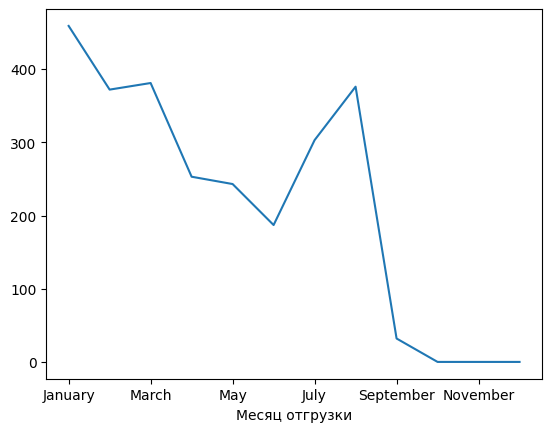

In [55]:
df.sort_values(by='Месяц отгрузки', ascending=True).groupby(['Месяц отгрузки'])['Количество'].count().plot()

а также сумму, не всегда большее количество соответсвует большей сумме

In [41]:
df.sort_values(by='Месяц отгрузки', ascending=True).groupby(['Месяц отгрузки'])['Итоговая стоимость товара'].sum()

Месяц отгрузки
January      81841.00
February     84776.18
March        74191.38
April        50470.82
May          46445.00
June         42635.50
July         67034.25
August       75763.00
September     5496.67
October          0.00
November         0.00
December         0.00
Name: Итоговая стоимость товара, dtype: float64

<Axes: xlabel='Месяц отгрузки'>

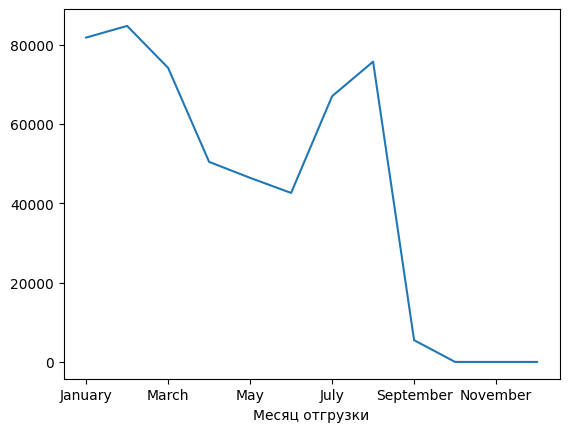

In [56]:
df.sort_values(by='Месяц отгрузки', ascending=True).groupby(['Месяц отгрузки'])['Итоговая стоимость товара'].sum().plot()

Также можно вывести отдельно по каждой позиции статистику по месяцам: Количество и Сумму.

In [42]:
df.groupby([df['Наименование товара'] == 'Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД', 'Месяц отгрузки'])['Количество'].count()

Наименование товара  Месяц отгрузки
False                January           403
                     February          338
                     March             317
                     April             197
                     May               214
                     June              156
                     July              250
                     August            318
                     September          22
                     October             0
                     November            0
                     December            0
True                 January            56
                     February           34
                     March              64
                     April              56
                     May                29
                     June               31
                     July               53
                     August             58
                     September          10
                     October             0
                  

In [43]:
df.groupby([df['Наименование товара'] == 'Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД', 'Месяц отгрузки'])['Итоговая стоимость товара'].sum()

Наименование товара  Месяц отгрузки
False                January           73468.00
                     February          78703.66
                     March             64296.02
                     April             41935.34
                     May               41955.06
                     June              37462.00
                     July              58323.26
                     August            66312.42
                     September          3878.00
                     October               0.00
                     November              0.00
                     December              0.00
True                 January            8373.00
                     February           6072.52
                     March              9895.36
                     April              8535.48
                     May                4489.94
                     June               5173.50
                     July               8710.99
                     August             9450.58
    